# Project 3
Team members: Paul, Renata and Hero

In this notebook we are training models to predict whether a food place will pass or fail an inspection. 

In [25]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

C:\Users\heroa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

In [7]:
chicago_inspections_2011_to_2013.head()

,,Inspection_Date,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,2013-01-31,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.0,1,44-33,19.0,Retail Food Establishment,RENEW,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,2011-10-18,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.0,1,50-23,24.0,Retail Food Establishment,RENEW,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,2011-10-18,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,50-25,17.0,Retail Food Establishment,RENEW,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,2011-10-19,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.0,1,39-48,17.0,Retail Food Establishment,RENEW,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,2011-10-20,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,40-18,24.0,Retail Food Establishment,RENEW,2006-07-07,2018-02-15,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0


## Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

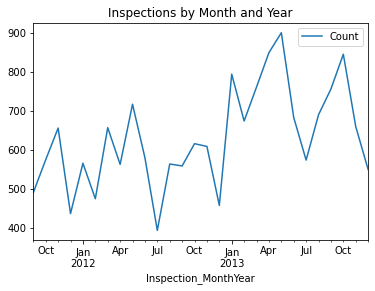

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

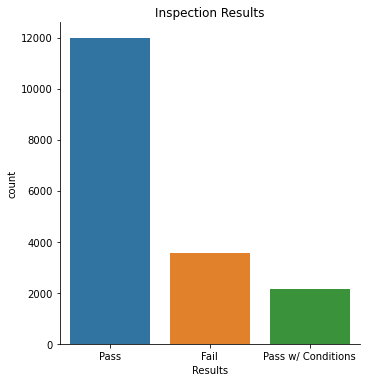

In [9]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

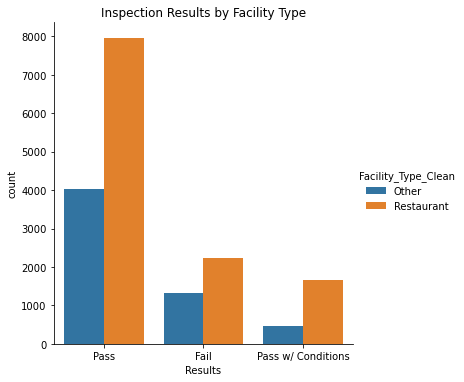

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [11]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [12]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [13]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

First, we initialize some lists to record our tuned hyperparameters and validation metrics for each model we run.

In [14]:
models = ['dtc','svm', 'log']
parameters = []
cv_r2 = []
validation_r2 = []
validation_rmse = []
trained_models = []
accuracy = []
recall = []
precision = []
f1_score = []

### Standardize Data
Before training the models, we standardize all our predictors. 

In [43]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

# normalizing features 
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns, index=X.index) 


In [46]:
#X.head()

### Model 1 - Random Forrests Decision Tree Classifier
A decision tree makes predictions based on a series of if-then conditions. A pro of decision trees is that they are highly flexible and allow for non-linear modelling. A con of decision trees is that they suffer from overfit, in which they can preduce low bias results for the training data but high variance results in the test data. To reduce the variance (at the cost of increased bias), we can impliment pruning techniques, such as controlling the maximum depth of the tree or setting a threshold for the Gini index below which we no longer split the data. We can also use ensemble methods, such as random forests, to reduce variance across multiple sets of data. 

In the context of this problem, a not-too complex decision tree (ie. one that has been pruned), could provide good insight into the types of predictors that are important for whether or not an establisment passes an inspection. This is useful for a policy context where policy makers not only want to know *which* establishments should be failed, but also *why* they are being failed. 

**incude stuff specificall on random forrests** from class: Growing a random forest and then simplifying down to a more basic decision tree is the basic procedure recommended by the [select-regress-round](https://arxiv.org/pdf/1702.04690.pdf) framework.


In [47]:
# tune hyperparameters using cross validation 
rf_classifier = RandomForestClassifier()

# grid of potnetial hyperparameters
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 5, 10],
             'min_impurity_decrease': [0.0001, 0.0005, 0.001],
             'random_state': [10]}

rf_grid = GridSearchCV(rf_classifier, param_grid, cv = 3, 
                       scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                       refit = 'precision')

# fit on entire data 
rf_grid.fit(X, y.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10],
                         'min_impurity_decrease': [0.0001, 0.0005, 0.001],
                         'random_state': [10]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [51]:
# report the best parameters from the grid search
best_index = np.argmax(rf_grid.cv_results_['mean_test_precision'])
rf_grid.cv_results_['params'][best_index]

# report various metrics from the best model
print(rf_grid.cv_results_['params'][best_index])
print("Mean accuracy is" ,rf_grid.cv_results_["mean_test_accuracy"][best_index])
print("Mean precision is" ,rf_grid.cv_results_["mean_test_precision"][best_index])
print("Mean recall is",rf_grid.cv_results_["mean_test_recall"][best_index])
print("Mean f1 is",rf_grid.cv_results_["mean_test_f1"][best_index])


{'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.0001, 'random_state': 10}
Mean accuracy is 0.79844555602857
Mean precision is 0.3333333333333333
Mean recall is 0.00032393909944930353
Mean f1 is 0.0006472491909385113


In [41]:
# calculate the accuracy score (rate of correct predictions) for 3 folds
scores = cross_val_score(rf_classifier, X, y.ravel(), cv=3)

In [18]:
# return the mean accuracy score across the 5 cross validation folds
scores.mean()

0.9181636629220709

The plot below shows which features are actually important in our model. 

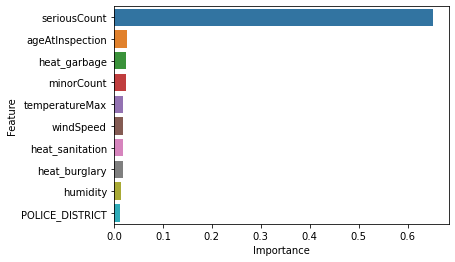

In [19]:
# Refit the random forest on the whole dataset to get feature importances
rf_classifier()
rf_classifier.fit(X, y.ravel())
import seaborn as sns

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

Given that only a subset of features are important, we retrain a simplified decision tree by using the subset of important features and placing additional limits on the complexity of the tree. This gives us a far more interpretable model, which we can even plot to see the decision paths for failing or passing establishments. 

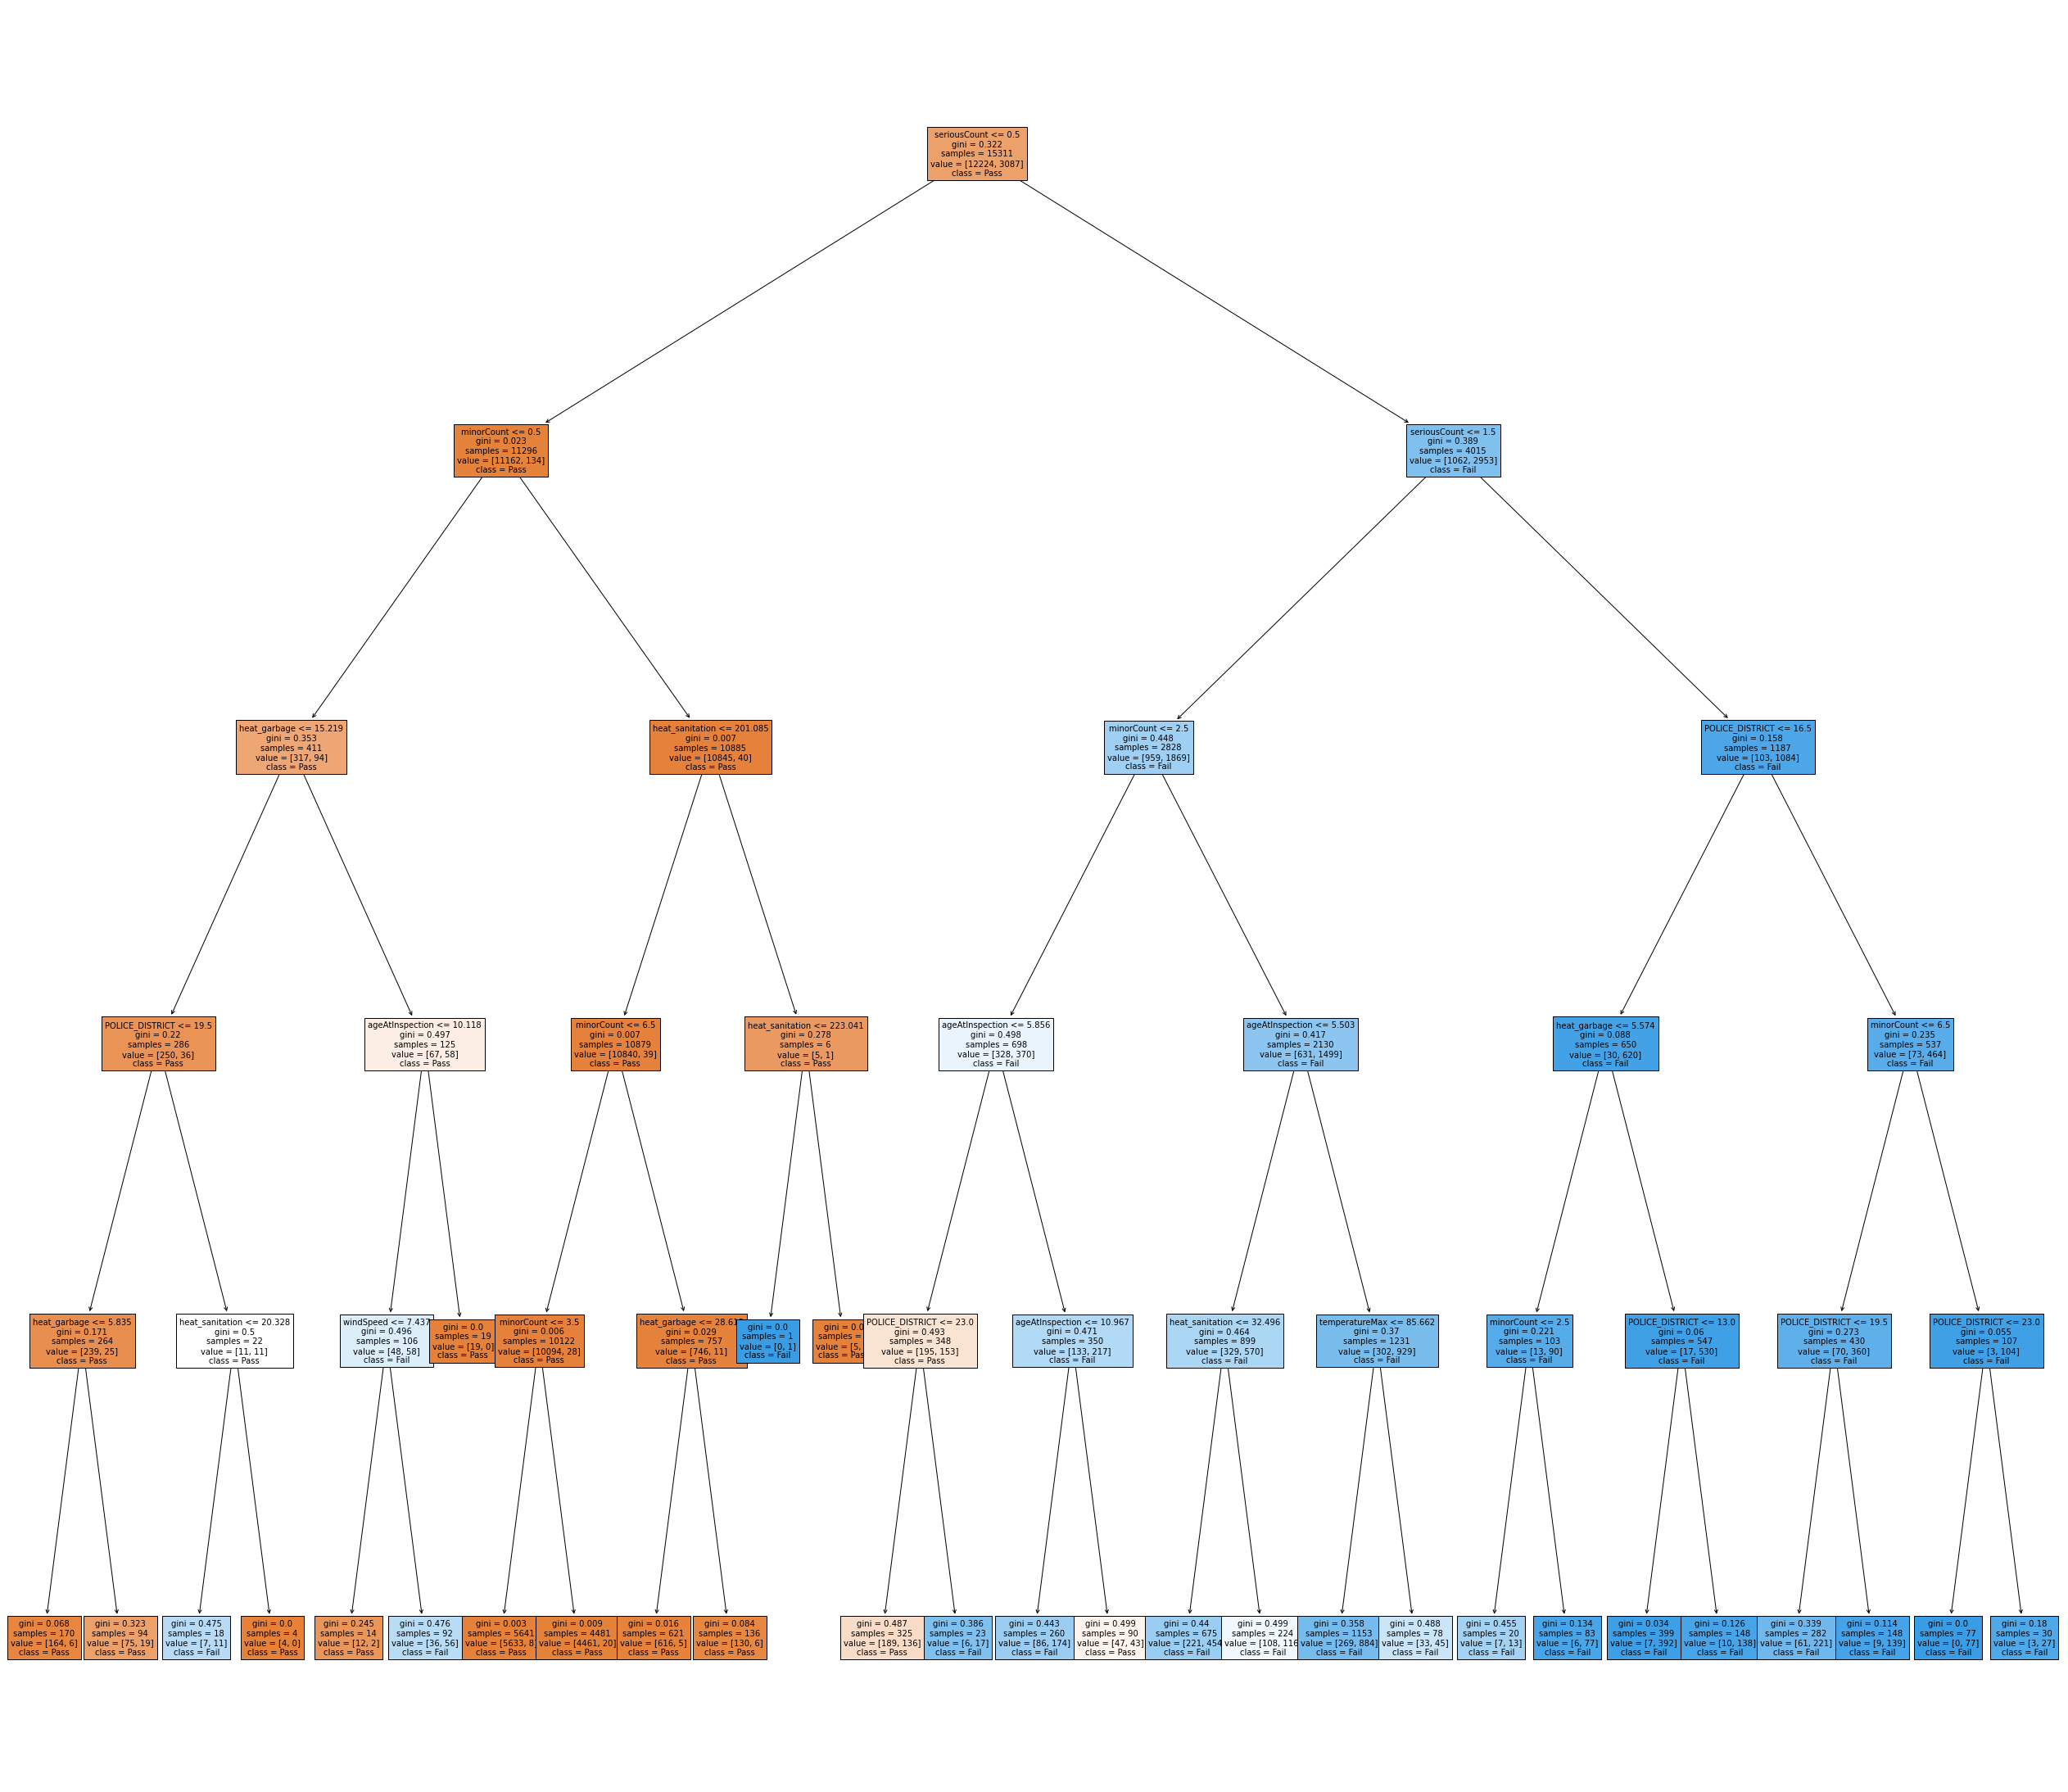

In [23]:
# use hyperparameters tuned above 
dt_reduced_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=5,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

important_features = feat_importances.nlargest(10, 'Importance')['Feature']

X_reduced = X[X.columns[X.columns.isin(important_features)]]

dt_reduced_classifier.fit(X_reduced, y)
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(dt_reduced_classifier, 
                   feature_names=X_reduced.columns,  
                   class_names=["Pass", "Fail"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 5)

## Model 2

## LDA

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

In [21]:
lda_model = clf.fit(X, y.ravel())

In [23]:
from sklearn.model_selection import cross_validate

#scores = cross_val_score(svm_model, X, y, cv=2)

lda_scores = cross_validate(lda_model, X, y.ravel(),
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                         cv=5, n_jobs = -1)

In [25]:
for x in lda_scores.keys(): 
    print("Average", x, "is", lda_scores[x].mean())

Average fit_time is 68.2551736831665
Average score_time is 0.20357084274291992
Average test_accuracy is 0.8956964063825781
Average test_precision is 0.7653076483501526
Average test_recall is 0.6994246091065968
Average test_f1 is 0.728841941643987


In [73]:
#upsampling using SMOTE
# from https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LinearDiscriminantAnalysis())

In [75]:
imba_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'lineardiscriminantanalysis', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'lineardiscriminantanalysis__n_components', 'lineardiscriminantanalysis__priors', 'lineardiscriminantanalysis__shrinkage', 'lineardiscriminantanalysis__solver', 'lineardiscriminantanalysis__store_covariance', 'lineardiscriminantanalysis__tol'])

In [103]:
#fyi this takes a while to run, even  w/ multiprocessing!

from sklearn.model_selection import GridSearchCV

#lda_reg = LinearDiscriminantAnalysis()

param_grid = {'lineardiscriminantanalysis__solver': ['svd', 'lsqr', 'eigen'],
               'lineardiscriminantanalysis__shrinkage': ['auto', None]}

lda_grid_reg = GridSearchCV(imba_pipeline, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision', verbose = 5) 
lda_grid_reg.fit(X, y.ravel())

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  4.9min remaining:   58.9s


KeyboardInterrupt: 

In [77]:
lda_grid_reg.cv_results_

{'mean_fit_time': array([ 46.97854265, 108.1683344 , 130.86838937, 115.11117458,
         57.36940694,  39.39853128]),
 'std_fit_time': array([0.56279493, 3.30252566, 3.78801618, 7.8162168 , 1.86633129,
        1.82217033]),
 'mean_score_time': array([0.        , 0.20731958, 0.21606064, 0.17291427, 0.14985474,
        0.        ]),
 'std_score_time': array([0.        , 0.04866612, 0.03768225, 0.03098654, 0.01366838,
        0.        ]),
 'param_lineardiscriminantanalysis__shrinkage': masked_array(data=['auto', 'auto', 'auto', None, None, None],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_lineardiscriminantanalysis__solver': masked_array(data=['svd', 'lsqr', 'eigen', 'svd', 'lsqr', 'eigen'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'lineardiscriminantanalysis__shrinkage': 'auto',
   'lineardiscriminantanalysis__solver': 's

In [78]:
best_index = np.where(lda_grid_reg.cv_results_["rank_test_precision"] == 1)[0]


''''

plt.scatter(ridge_grid_reg.cv_results_['param_alpha'], ridge_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

'''''

for i in best_index:
    print(lda_grid_reg.cv_results_['params'][i])
    print("Mean accuracy is" ,lda_grid_reg.cv_results_["mean_test_accuracy"][i])
    print("Mean precision is" ,lda_grid_reg.cv_results_["mean_test_precision"][i])
    print("Mean recall is",lda_grid_reg.cv_results_["mean_test_recall"][i])
    print("Mean f1 is",lda_grid_reg.cv_results_["mean_test_f1"][i])

{'lineardiscriminantanalysis__shrinkage': 'auto', 'lineardiscriminantanalysis__solver': 'lsqr'}
Mean accuracy is 0.9077134206710623
Mean precision is 0.7359641896239243
Mean recall is 0.8461289277615808
Mean f1 is 0.7870836108376714
{'lineardiscriminantanalysis__shrinkage': 'auto', 'lineardiscriminantanalysis__solver': 'eigen'}
Mean accuracy is 0.9077134206710623
Mean precision is 0.7359641896239243
Mean recall is 0.8461289277615808
Mean f1 is 0.7870836108376714


In [82]:
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr'))

lda_tuned_scores = cross_validate(imba_pipeline, X, y, scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1)

In [86]:
for i in lda_tuned_scores:
    print("Average", i, "is", lda_tuned_scores[i].mean())

Average fit_time is 124.55774893760682
Average score_time is 0.1292851448059082
Average test_precision is 0.7377257801218051
Average test_accuracy is 0.9111095473182054
Average test_recall is 0.8688239891320884
Average test_f1 is 0.7975561328261314


# QDA

In [88]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

In [89]:
qda_model = qda.fit(X, y.ravel())

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [91]:
from sklearn.model_selection import cross_validate

#scores = cross_val_score(svm_model, X, y, cv=2)

qda_scores = cross_validate(qda_model, X, y.ravel(),
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                         cv=5, n_jobs = -1)

In [92]:
#QDA is bad lol

for x in qda_scores.keys(): 
    print("Average", x, "is", qda_scores[x].mean())

Average fit_time is 154.34765176773072
Average score_time is 6.81153507232666
Average test_accuracy is 0.33786196385804484
Average test_precision is 0.20568844762402244
Average test_recall is 0.796888588168033
Average test_f1 is 0.32690035432270137


# SVM

In [94]:
from sklearn.svm import SVC

svm = make_pipeline(SMOTE(random_state=10), 
                              SVC())

svm_scores = cross_validate(svm, X, y, scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1)

In [96]:
for x in svm_scores.keys(): 
    print("Average", x, "is", svm_scores[x].mean())

Average fit_time is 468.3710587978363
Average score_time is 46.32334475517273
Average test_precision is 0.7363916823184392
Average test_accuracy is 0.9217556077435898
Average test_recall is 0.9543295935547829
Average test_f1 is 0.8309851078446429


In [100]:
svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'svc', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [101]:
#fyi this takes a while to run, even  w/ multiprocessing

# from sklearn.model_selection import GridSearchCV


# param_grid = {'svc__C': np.arange(0.1, 1.0, 0.1),
#                'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#              'svc__gamma': ['scale', 'auto'],
#              'svc__shrinking': [True, False]}

# svm_grid_reg = GridSearchCV(svm, param_grid, cv=5, iid=False, 
#                             scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
#                            refit = 'precision') 
# svm_grid_reg.fit(X, y.ravel())

KeyboardInterrupt: 

In [ ]:
best_index = np.where(svm_grid_reg.cv_results_["rank_test_precision"] == 1)[0]


''''

plt.scatter(ridge_grid_reg.cv_results_['param_alpha'], ridge_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

'''''

for i in best_index:
    print(svm_grid_reg.cv_results_['params'][i])
    print("Mean accuracy is" , svm_grid_reg.cv_results_["mean_test_accuracy"][i])
    print("Mean precision is" ,svm_grid_reg.cv_results_["mean_test_precision"][i])
    print("Mean recall is",svm_grid_reg.cv_results_["mean_test_recall"][i])
    print("Mean f1 is",svm_grid_reg.cv_results_["mean_test_f1"][i])

## Model 3

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]